In [1]:
# import basics first.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)
%matplotlib inline

# Part 1, getting a data

In [2]:
# read train.csv file
house = pd.read_csv("train.csv")
# Explore data
house.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,138500


In [3]:
# Select features and target.
X = house.drop('SalePrice', axis=1)
y = house['SalePrice']

# Part 2, Train and Test Split

In [4]:
# Train and test split on X and y.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1374, 81) (677, 81) (1374,) (677,)


# Part 3, EDA

In [5]:
# Check information on each columns to see missing values and types of columns.
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1374 entries, 1244 to 812
Data columns (total 81 columns):
Id                 1374 non-null int64
PID                1374 non-null int64
MS SubClass        1374 non-null int64
MS Zoning          1374 non-null object
Lot Frontage       1167 non-null float64
Lot Area           1374 non-null int64
Street             1374 non-null object
Alley              103 non-null object
Lot Shape          1374 non-null object
Land Contour       1374 non-null object
Utilities          1374 non-null object
Lot Config         1374 non-null object
Land Slope         1374 non-null object
Neighborhood       1374 non-null object
Condition 1        1374 non-null object
Condition 2        1374 non-null object
Bldg Type          1374 non-null object
House Style        1374 non-null object
Overall Qual       1374 non-null int64
Overall Cond       1374 non-null int64
Year Built         1374 non-null int64
Year Remod/Add     1374 non-null int64
Roof Style         

In [6]:
# I will concat x and y for EDA. 
# Moreover, I need to drop some of missing values row.
# And I will drop those rows on my target(y) as well. 
# SO, I will re-assign X and y when all missing values treatment is done
# concat two training datas to proceed EDA
house_train = pd.concat([X_train, y_train], axis=1)

# concat X and y test data 

house_test = pd.concat([X_test, y_test], axis=1)
# check how it concat
house_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1244,485,528275160,60,RL,NaN,12891,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,651.0,Unf,0.0,219.0,870.0,GasA,Ex,Y,SBrkr,878,1126,0,2004,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2002.0,Fin,3.0,644.0,TA,TA,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,257500
1531,1938,535325320,50,RL,55.0,7150,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1.5Fin,4,4,1955,1955,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,TA,TA,No,Rec,150.0,Unf,0.0,1040.0,1190.0,GasA,Gd,Y,SBrkr,1040,500,0,1540,1.0,0.0,1,0,4,1,Fa,7,Typ,0,NaN,Detchd,2002.0,Unf,1.0,352.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,115000
1940,1809,531375140,20,RL,60.0,12450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,RRAe,Norm,1Fam,1Story,5,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,126.0,Gd,TA,PConc,Gd,TA,No,GLQ,729.0,Unf,0.0,365.0,1094.0,GasA,Ex,Y,SBrkr,1094,0,0,1094,1.0,0.0,1,0,3,1,Gd,6,Typ,0,NaN,Detchd,2004.0,Unf,2.0,576.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,149000
1070,59,528292020,60,RL,NaN,9505,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,180.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,884.0,884.0,GasA,Ex,Y,SBrkr,884,1151,0,2035,0.0,0.0,2,1,3,1,Gd,8,Typ,1,Gd,BuiltIn,2001.0,Fin,2.0,434.0,TA,TA,Y,144,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,222500
420,356,527162120,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1999,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,476.0,Unf,0.0,476.0,952.0,GasA,Gd,Y,SBrkr,952,684,0,1636,1.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1998.0,Fin,2.0,440.0,TA,TA,Y,0,84,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,191000


In [7]:
# For MSSubClass, Yr sold, Mo Sold, and Overall Qual, I change types of columns to object 
# because number are either coded numbers and does not mean of numerical values.

house_train['MS SubClass'] = house_train['MS SubClass'].astype(str)
house_test['MS SubClass'] = house_test['MS SubClass'].astype(str)

house_train['Yr Sold'] = house_train['Yr Sold'].astype(str)
house_test['Yr Sold'] = house_test['Yr Sold'].astype(str)

house_train['Mo Sold'] = house_train['Mo Sold'].astype(str)
house_test['Mo Sold'] = house_test['Mo Sold'].astype(str)

house_train['Overall Qual'] =house_train['Overall Qual'].astype(str)
house_test['Overall Qual'] =house_test['Overall Qual'].astype(str)

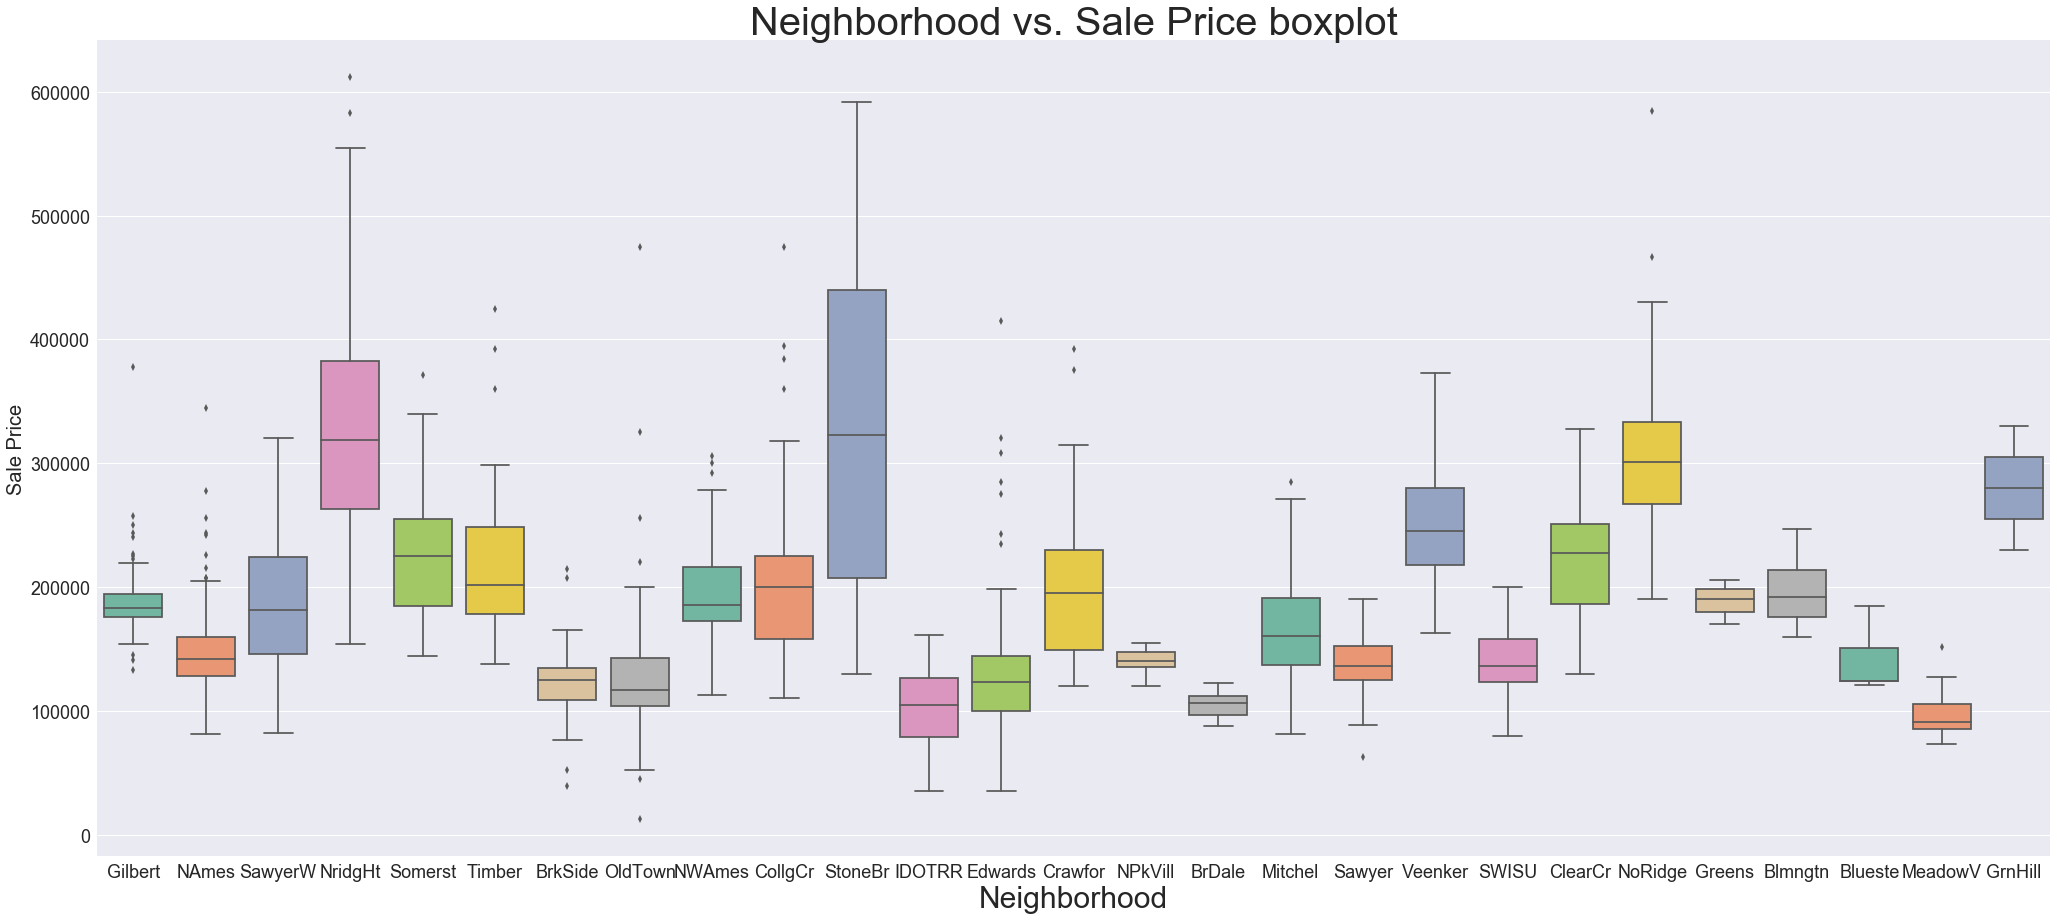

In [8]:
# boxplot of neighborhood
# create subplots with fig size
fig, ax = plt.subplots(figsize=(35, 15))
fig = sns.boxplot(x='Neighborhood', y="SalePrice", data=house_train, palette="Set2")

# Give labels and titles.
ax.set_title("Neighborhood vs. Sale Price boxplot", fontdict={'fontsize': 40})
ax.set_ylabel('Sale Price', fontdict={'fontsize': 20})
ax.set_xlabel('Neighborhood', fontdict={'fontsize': 30})
ax.tick_params(labelsize=18);

From Neighborhood vs. Sale Price boxplot, I can see that 'StoneBr' and 'NridgHt' are high and wide spread.

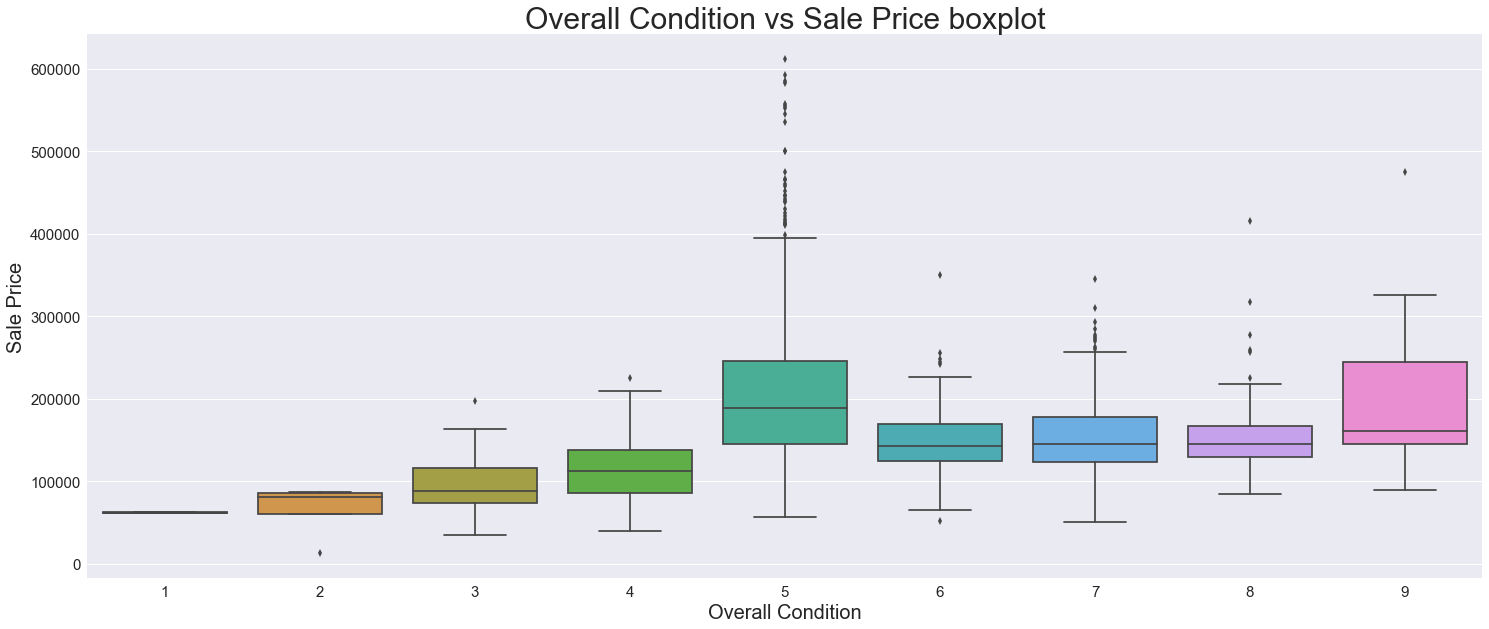

In [9]:
# This time, I want to see overall condition and SalePrice comparison by boxplot
fig, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x='Overall Cond', y="SalePrice", data=house_train)

ax.set_title("Overall Condition vs Sale Price boxplot", fontdict={'fontsize': 30})
ax.set_ylabel('Sale Price', fontdict={'fontsize': 20})
ax.set_xlabel('Overall Condition', fontdict={'fontsize': 20})
ax.tick_params(labelsize=15);


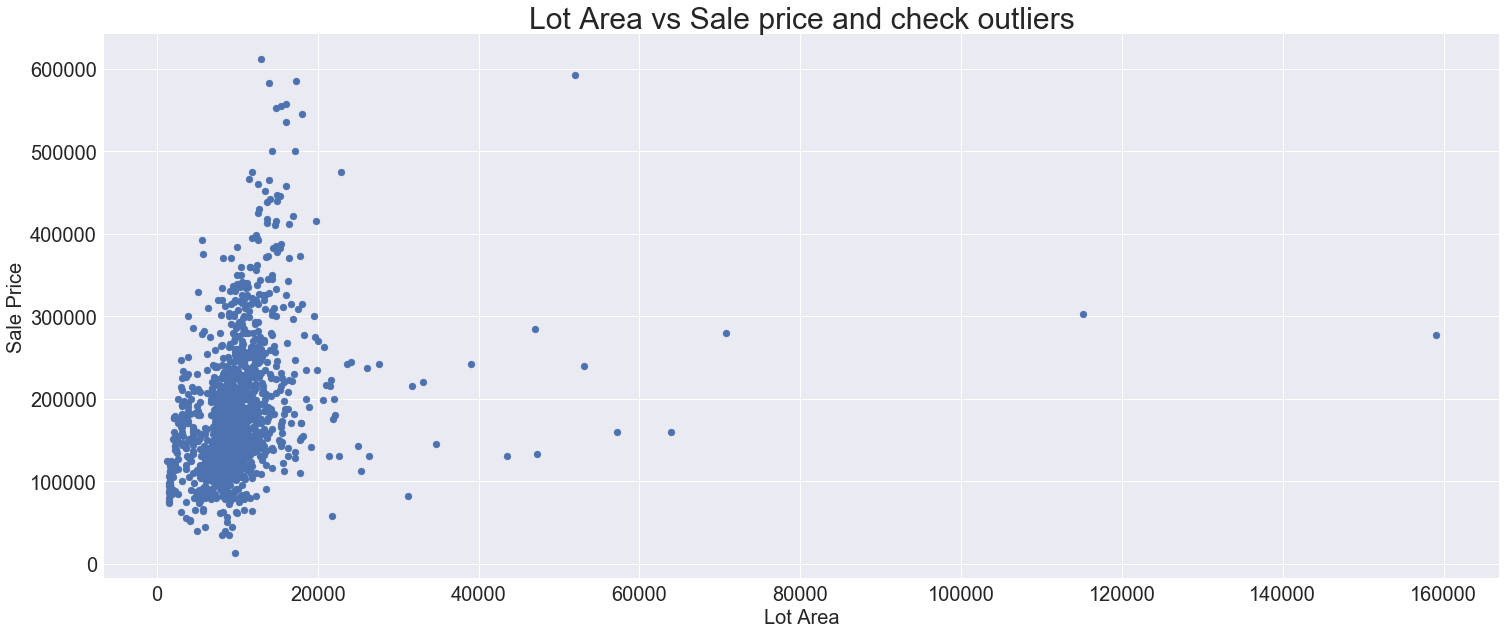

In [10]:
# Check some outliers on Lot areas. 
fig, ax = plt.subplots(figsize=(25, 10))
ax.scatter(x=house_train['Lot Area'], y=house_train['SalePrice'])

# set title and x,y label.
plt.ylabel('Sale Price', fontsize=20)
plt.xlabel('Lot Area', fontsize=20)
plt.title("Lot Area vs Sale price and check outliers", fontsize=30)
ax.tick_params(labelsize=20);



In [11]:
# Assign lot area > 30000 differently because it is on different sale price range.
lot_area_outlier_average = house_train.SalePrice[house_train['Lot Area']> 30000].mean()
print(lot_area_outlier_average)

230752.46666666667


In [12]:
# houses that have Lot Area bigger than 30000 seems outliers, so I need to delete those rows.
house_train = house_train[house_train['Lot Area']< 30000]
house_test = house_test[house_test['Lot Area']< 30000]

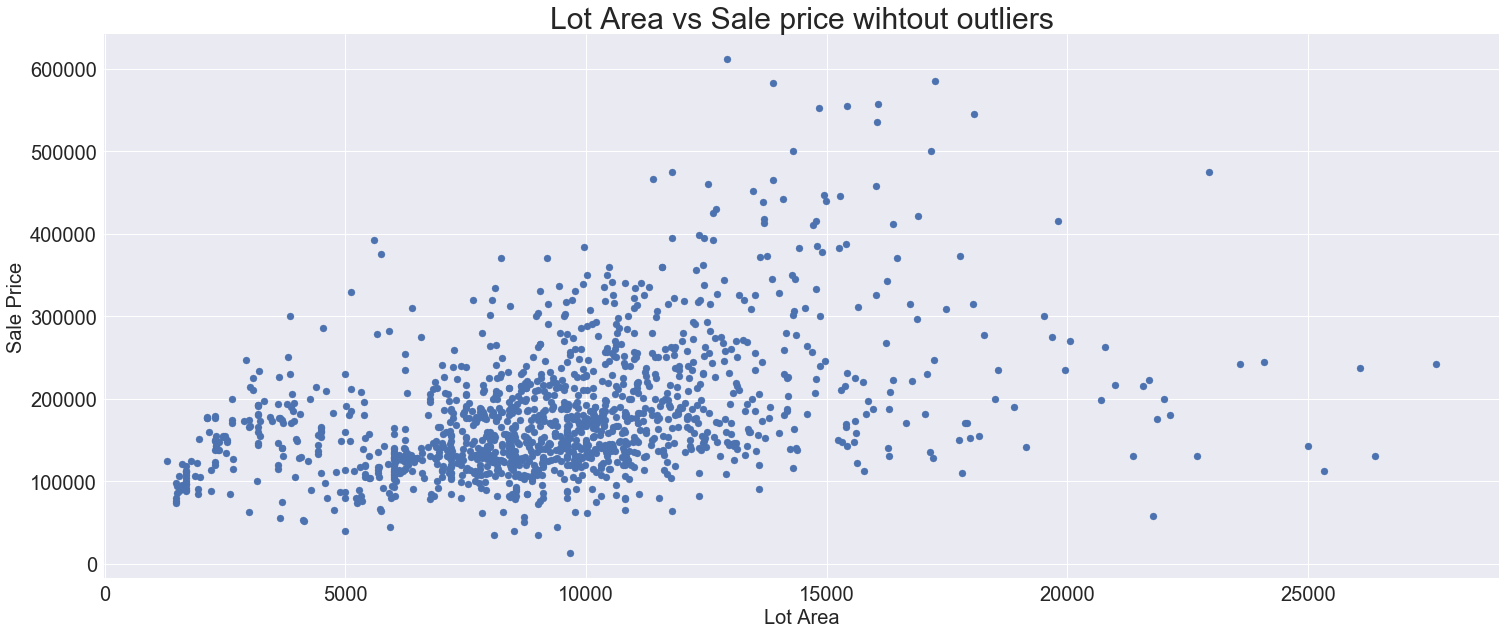

In [13]:
# Check after eliminating outliers on Lot areas. 
fig, ax = plt.subplots(figsize=(25, 10))
ax.scatter(x=house_train['Lot Area'], y=house_train['SalePrice'])

# set title and x,y label.
plt.ylabel('Sale Price', fontsize=20)
plt.xlabel('Lot Area', fontsize=20)
plt.title("Lot Area vs Sale price wihtout outliers", fontsize=30)
ax.tick_params(labelsize=20);

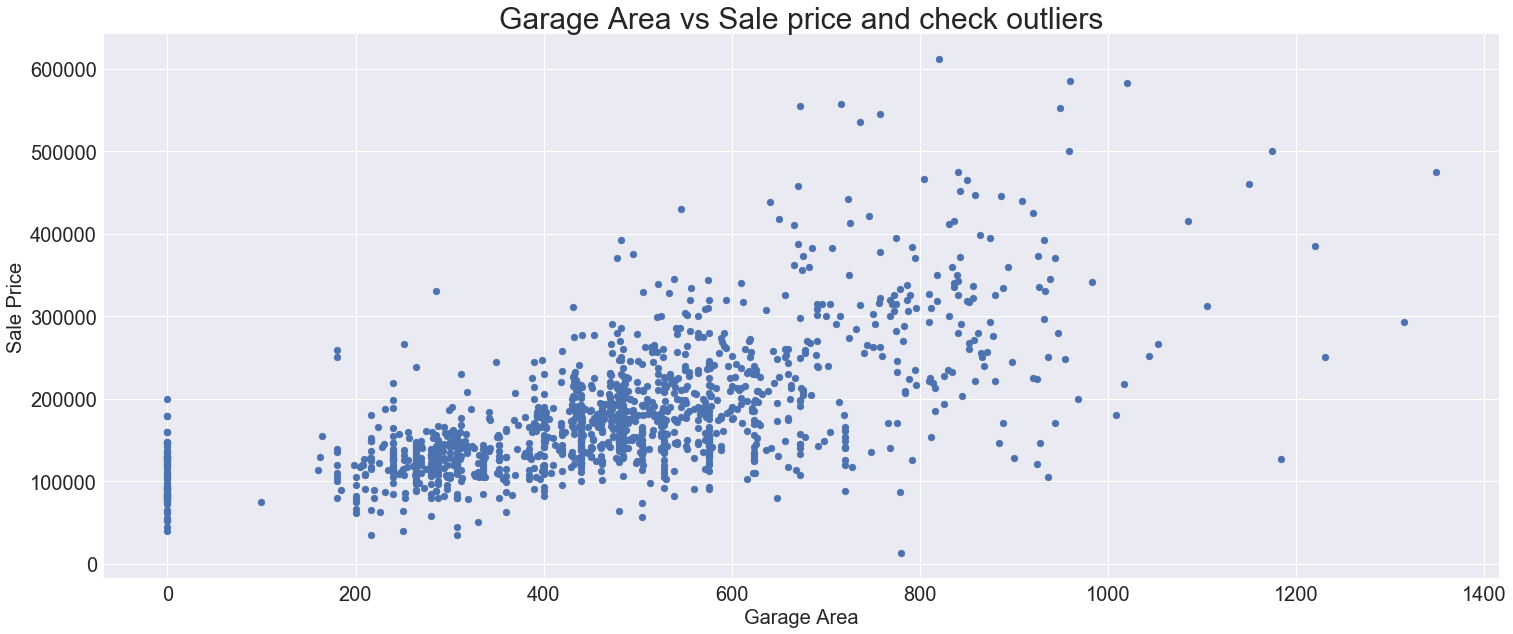

In [14]:
# Check some outliers on garage areas. 
fig, ax = plt.subplots(figsize=(25, 10))
ax.scatter(x=house_train['Garage Area'], y=house_train['SalePrice'])

# set title and x,y label.
plt.ylabel('Sale Price', fontsize=20)
plt.xlabel('Garage Area', fontsize=20)
plt.title("Garage Area vs Sale price and check outliers", fontsize=30)
ax.tick_params(labelsize=20);

In [15]:
# Assign garage_area outlier differently because it is on different sale price range. 
garage_area_outlier_average = house_train.SalePrice[house_train['Garage Area']> 1200].mean()
print(garage_area_outlier_average)

350625.0


In [16]:
# houses that have Garage Area bigger than 1200 seems outliers, so I need to delete those rows.
house_train = house_train[house_train['Garage Area']< 1200]
house_test = house_test[house_test['Garage Area']< 1200]

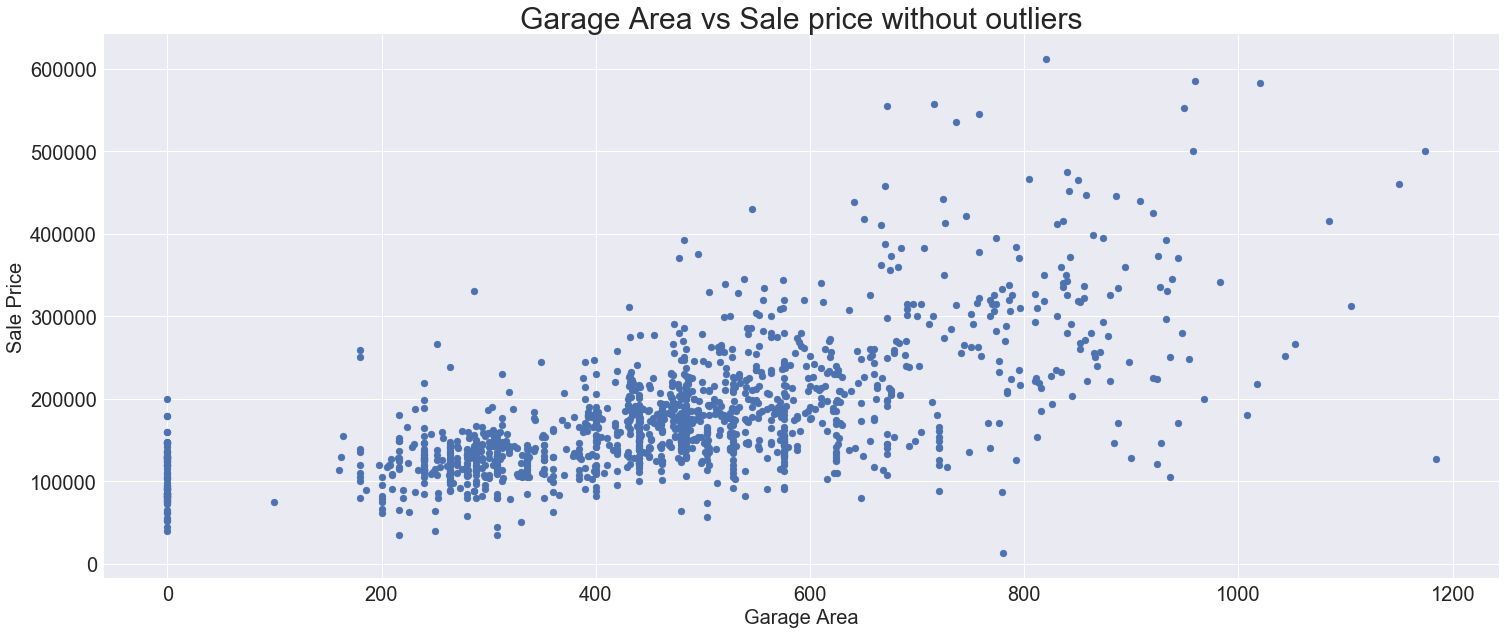

In [17]:
# Check after eliminating outliers on Garage Area.
fig, ax = plt.subplots(figsize=(25, 10))
ax.scatter(x=house_train['Garage Area'], y=house_train['SalePrice'])

# set title and x,y label.
plt.ylabel('Sale Price', fontsize=20)
plt.xlabel('Garage Area', fontsize=20)
plt.title("Garage Area vs Sale price without outliers", fontsize=30)
ax.tick_params(labelsize=20);

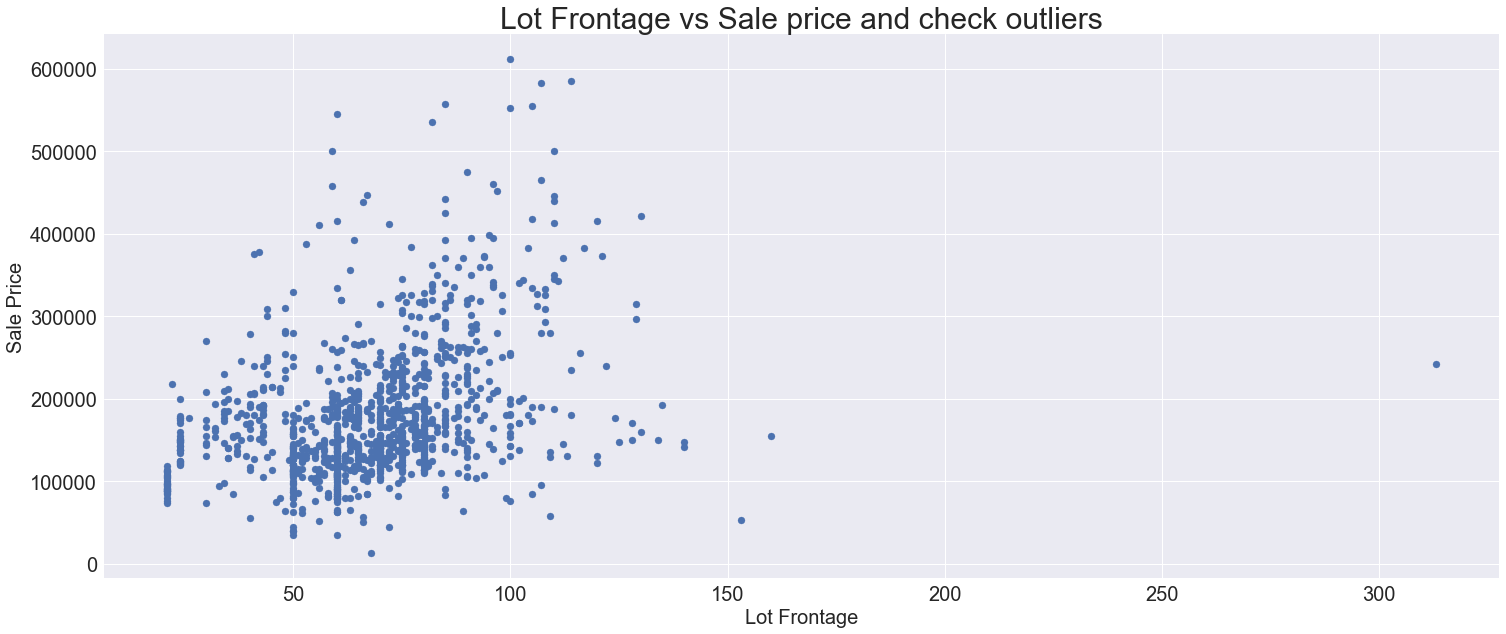

In [18]:
# Check some outliers on Lot Frontage. 
fig, ax = plt.subplots(figsize=(25, 10))
ax.scatter(x=house_train['Lot Frontage'], y=house_train['SalePrice'])
# set title and x,y label.
plt.ylabel('Sale Price', fontsize=20)
plt.xlabel('Lot Frontage', fontsize=20)
plt.title("Lot Frontage vs Sale price and check outliers", fontsize=30)
ax.tick_params(labelsize=20);

In [19]:
house_train['Lot Frontage'].isnull().sum()

201

In [20]:
#for 'Lot Frontage', I choose median to fill the missing values 
# because mode is too low from mean and median is middle number from mean, mode, and median. 
# Moreover, I make groupby with neighborhood to make it more accurate.
# For remaining missing value, I will use median of Lot frontage total.
house_train['Lot Frontage'] = house_train.groupby('Neighborhood')['Lot Frontage'].transform(lambda x:x.fillna(x.median()))
house_test['Lot Frontage'] = house_test.groupby('Neighborhood')['Lot Frontage'].transform(lambda x:x.fillna(x.median()))

In [21]:
house_train['Lot Frontage'].isnull().sum()

2

In [22]:
house_train['Lot Frontage'].fillna(house_train['Lot Frontage'].median(), inplace=True)
house_test['Lot Frontage'].fillna(house_test['Lot Frontage'].median(), inplace=True)

In [23]:
house_train['Lot Frontage'].isnull().sum()

0

In [24]:
# Assign Lot Frontage outlier differently because it is on different sale price range.
lf_outlier_price = house_train.SalePrice[house_train['Lot Frontage']> 150].median()
print(lf_outlier_price)

154204.0


In [25]:
# houses that have Lot Frontage bigger than 150 seems outliers, so I need to delete those rows.
house_train = house_train[house_train['Lot Frontage']< 150]
house_test = house_test[house_test['Lot Frontage']< 150]

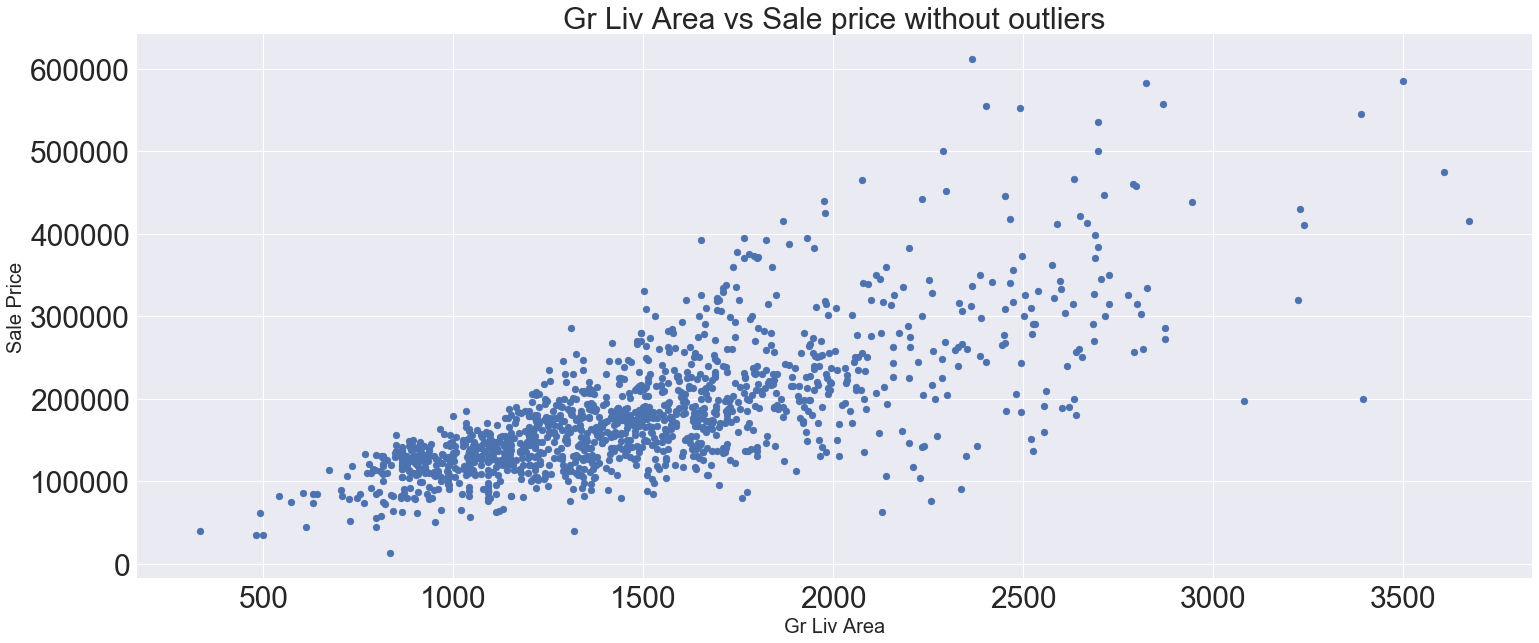

In [26]:
fig, ax = plt.subplots(figsize=(25, 10))
ax.scatter(x=house_train['Gr Liv Area'], y=house_train['SalePrice'])
# set title and x,y label.
plt.ylabel('Sale Price', fontsize=20)
plt.xlabel('Gr Liv Area', fontsize=20)
plt.title("Gr Liv Area vs Sale price without outliers", fontsize=30)
ax.tick_params(labelsize=30);

In [27]:
gla_outlier_price = house_train.SalePrice[house_train['Gr Liv Area']> 3000].median()
print(gla_outlier_price)

415000.0


In [28]:
house_train = house_train[house_train['Gr Liv Area']< 3000]
house_test = house_test[house_test['Gr Liv Area']< 3000]

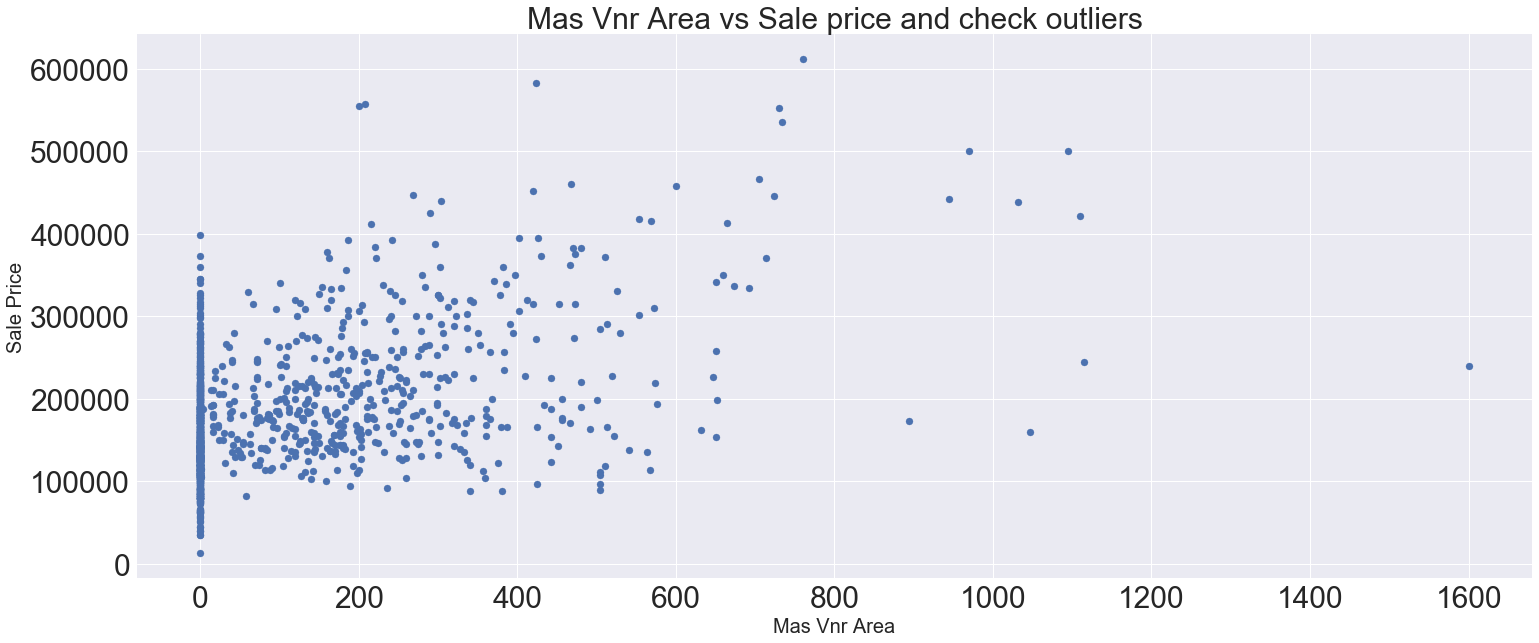

In [29]:
# Check some outliers on Mas Vnr Area. 
fig, ax = plt.subplots(figsize=(25, 10))
ax.scatter(x=house_train['Mas Vnr Area'], y=house_train['SalePrice'])

# set title and x,y label.
plt.ylabel('Sale Price', fontsize=20)
plt.xlabel('Mas Vnr Area', fontsize=20)
plt.title("Mas Vnr Area vs Sale price and check outliers", fontsize=30)
ax.tick_params(labelsize=30);

In [30]:
house_train['Mas Vnr Area'].isnull().sum()

14

In [31]:
house_train['Mas Vnr Area'].fillna(0, inplace=True)
house_test['Mas Vnr Area'].fillna(0, inplace=True)

In [32]:
mva_outlier_price = house_train.SalePrice[house_train['Mas Vnr Area']> 800].mean()
print(mva_outlier_price)

346386.22222222225


In [33]:
house_train = house_train[house_train['Mas Vnr Area']< 800]
house_test = house_test[house_test['Mas Vnr Area']< 800]

In [34]:
# sale price describe

           SalePrice
count    1333.000000
mean   178165.998500
std     75163.355478
min     12789.000000
25%    128900.000000
50%    161000.000000
75%    210250.000000
max    611657.000000


/Users/jasonjklim/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.
  from ipykernel import kernelapp as app


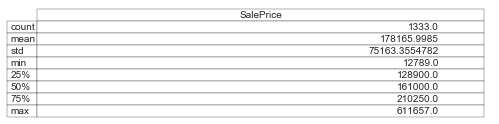

In [35]:
# check sale price data
df = pd.DataFrame(house_train.SalePrice.describe())
from pandas.tools.plotting import table

print(df)

# set fig size
fig, ax = plt.subplots(figsize=(8, 2)) 
# no axes
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
# no frame
ax.set_frame_on(False)  
# plot table
tab = table(ax, df, loc='upper right')  
# set font manually
# tab.auto_set_font_size(False)
# tab.set_fontsize(20) 
# save the result
plt.savefig('table.png')

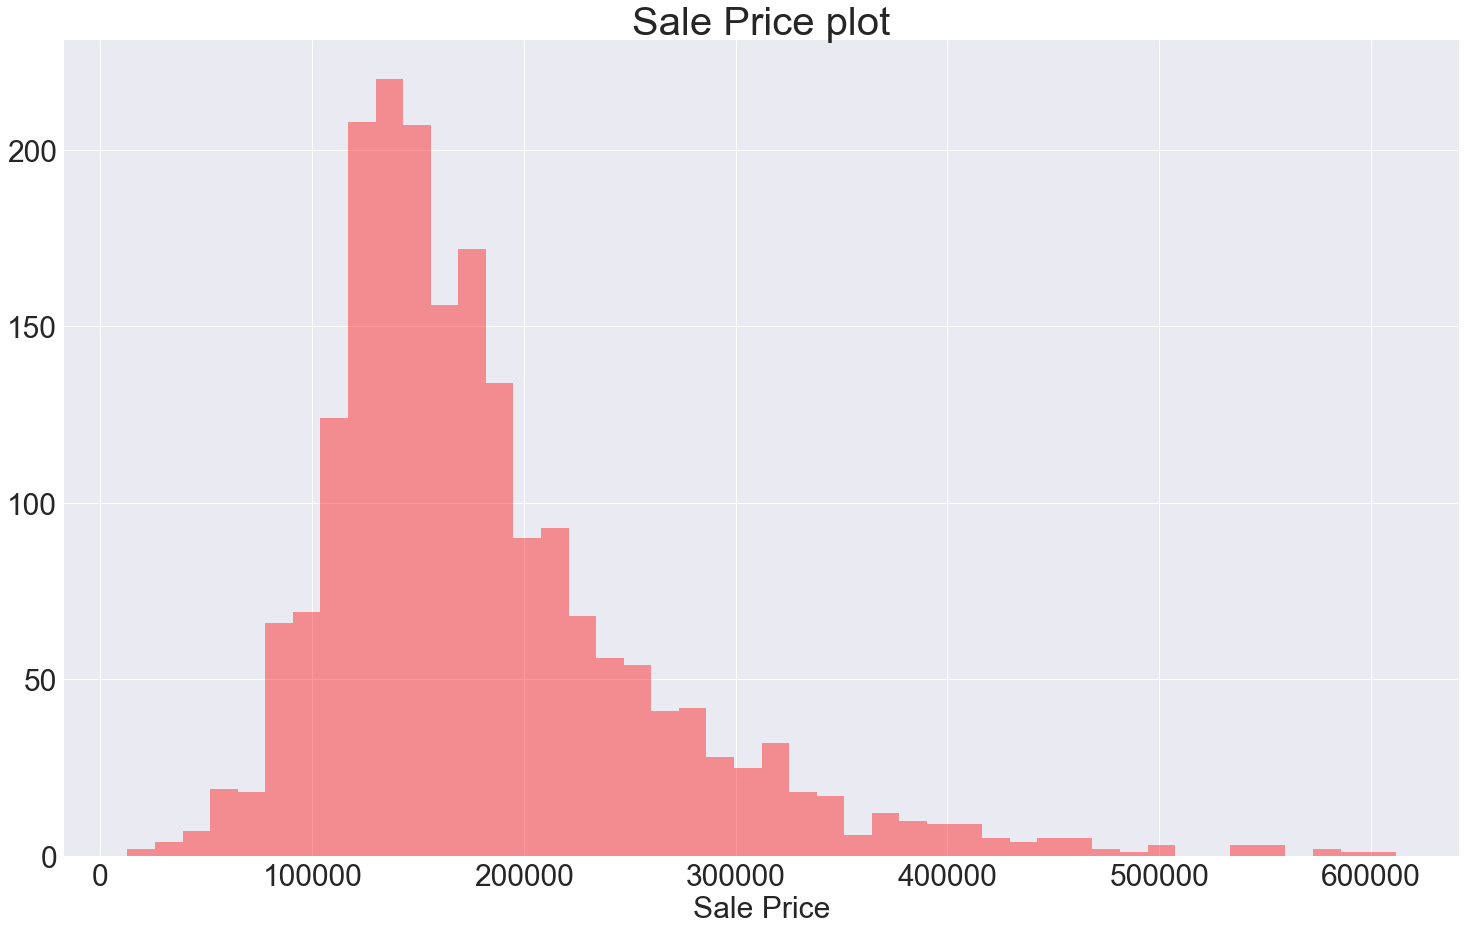

In [118]:
# check distplot

# create subplots with fig size
fig, ax = plt.subplots(figsize=(25, 15))
fig = sns.distplot(house['SalePrice'], kde=False, color='r')

# Give labels and titles.
ax.set_title("Sale Price plot", fontdict={'fontsize': 40})
ax.set_xlabel('Sale Price', fontdict={'fontsize': 30})
ax.tick_params(labelsize=30);


Check how whole saleprice has been distributed. This is right skewed distribution.

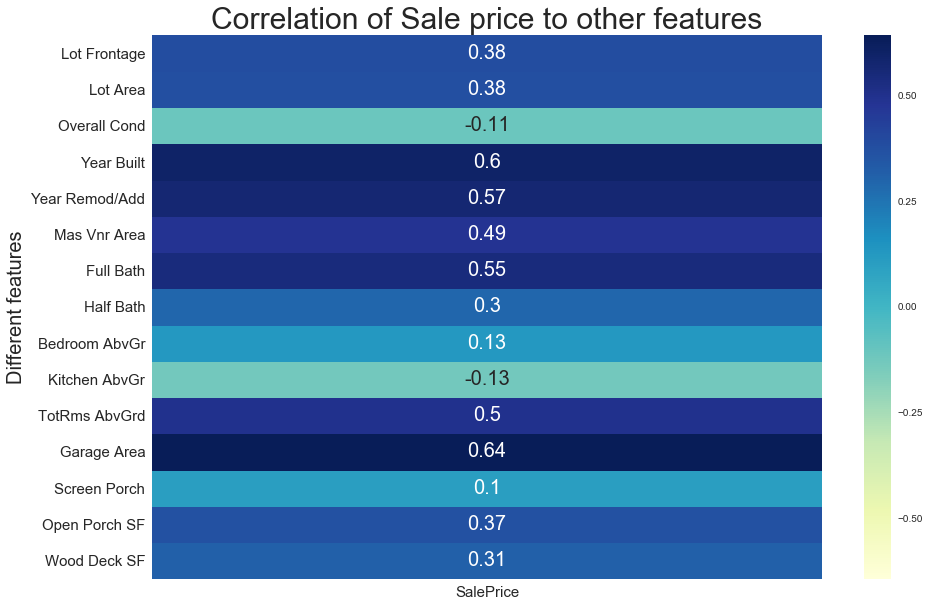

In [37]:
# I want to see correlation of saleprice
# First, take out all use data and create new data name, house_train_pre

house_train_pre = house_train[['MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Bsmt Qual',
       'Bsmt Cond', 'Heating QC', 'Central Air','Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Garage Area', 'Garage Qual',
       'Garage Cond', 'Screen Porch','Open Porch SF', 'Wood Deck SF','SalePrice']]
fig, ax = plt.subplots(figsize=(15, 10))
# I want to know correlation of Saleprice to other features. 
# Thus, I just take out corr() of house_train_pre column and making it data frame with to_frame.
house_corr = house_train_pre.corr()['SalePrice'].to_frame()

# I need to delete last index because it is correlationship of saleprice itself, which is 1.
house_corr = house_corr.drop(house_corr.index[-1])

# creating heatmap with annot to show value of each correlation.
fig = sns.heatmap(house_corr, annot=True, cmap="YlGnBu",  annot_kws={"size": 20})
ax.set_title("Correlation of Sale price to other features" , fontdict={'fontsize': 30})
ax.set_ylabel('Different features', fontdict={'fontsize': 20})

ax.tick_params(labelsize=15)

In [38]:
# change some of quality & condition grading to numerics 
def qual_cond_dict(x):
    if x =='Ex':
        return 5
    elif x == 'Gd':
        return 4
    elif x == 'TA':
        return 3
    elif x == 'Fa':
        return 2
    elif x == 'Po':
        return 1
    elif x == 'NA':
        return 0
    else :
        return x

In [39]:
# First, apply to house train data because I use some of columns for my EDA, too.
house_train = house_train.applymap(qual_cond_dict)
# Second, apply to X_test data.
house_test = house_test.applymap(qual_cond_dict)

# Missing value treatment

In [40]:
# check columns that have missing values
house_train.isnull().sum()[house_train.isnull().sum() > 0].sort_values(ascending=False)

Pool QC           1330
Misc Feature      1296
Alley             1234
Fence             1071
Fireplace Qu       667
Garage Cond         68
Garage Finish       68
Garage Yr Blt       68
Garage Type         68
Garage Qual         68
Bsmt Exposure       33
BsmtFin Type 1      32
Bsmt Qual           32
Bsmt Cond           32
BsmtFin Type 2      32
Mas Vnr Type        14
Bsmt Unf SF          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Full Bath       1
Bsmt Half Bath       1
Total Bsmt SF        1
dtype: int64

For missing values, I will fill "None" and "0" because there are no values to add on there, which means there are none of these features on that rows.

In [41]:
# Use for loop, to fill missing values
for col in ['Alley', 'Fence', 'Misc Feature','Garage Type','Garage Finish',
            'Bsmt Exposure','BsmtFin Type 1', 'BsmtFin Type 2','Mas Vnr Type']:
    house_train[col] = house_train[col].fillna("None")
    house_test[col] = house_test[col].fillna("None")
    

for col in ['Fireplace Qu','Pool QC','Garage Yr Blt',  'Garage Cars', 'Garage Area',
            'BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath',
            'Bsmt Half Bath','Mas Vnr Area','Bsmt Cond', 'Bsmt Qual',
            'Garage Qual', 'Garage Cond']:
    house_train[col] = house_train[col].fillna(0)
    house_test[col] = house_test[col].fillna(0)

In [42]:
# check columns that have missing values again.
print (house_train.isnull().sum()[house_train.isnull().sum() > 0])
# Do samething to X_test set
house_test.isnull().sum()[house_test.isnull().sum() > 0]

Series([], dtype: int64)


Series([], dtype: int64)

In [43]:
# Made Total_SF to combine basement, 1st, and 2nd Sf.
house_train['Total_SF']= house_train['Total Bsmt SF']+house_train['1st Flr SF'] + house_train['2nd Flr SF']
house_test['Total_SF']= house_test['Total Bsmt SF']+house_test['1st Flr SF'] + house_test['2nd Flr SF']

In [44]:
# Make some columns as dummies because some variables have meanings.
# For example, 'Neighborhood_StoneBr' means higher sale price than other neighborhood
house_train = pd.concat([house_train.drop(house_train[['MS Zoning','MS SubClass', 
                                                       'Bldg Type','House Style', 'Neighborhood', 'Sale Type']], axis=1),
                        pd.get_dummies(house_train[['MS Zoning','MS SubClass', 
                                                       'Bldg Type','House Style', 'Neighborhood', 'Sale Type']])], axis=1)
house_test = pd.concat([house_test.drop(house_test[['MS Zoning','MS SubClass', 
                                                       'Bldg Type','House Style', 'Neighborhood', 'Sale Type']], axis=1),
                        pd.get_dummies(house_test[['MS Zoning','MS SubClass', 
                                                       'Bldg Type','House Style', 'Neighborhood', 'Sale Type']])], axis=1)

In [45]:
# re-assign X_train, test and y_train, test after missing value treatment
X_train = house_train.drop(house_train[['SalePrice', 'Id', 'PID', 'Sale Condition']], axis=1)
y_train = house_train['SalePrice']

X_test = house_test.drop(house_test[['SalePrice', 'Id', 'PID', 'Sale Condition']], axis=1)
y_test = house_test['SalePrice']

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1333, 143) (656, 138) (1333,) (656,)


In [46]:
# Use label encoder to treat remaining object columns as numercial values on each results.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['Lot Shape','Land Contour', 'Overall Qual','Condition 1', 'Condition 2','Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type','BsmtFin Type 1',
       'BsmtFin Type 2', 'Heating', 'Central Air','Functional',
       'Garage Type', 'Garage Finish', 'Paved Drive', 'Fence', 'Misc Feature']:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.fit_transform(X_test[col])

# Selecting features

In [47]:
# Only take columns with numercial values
X_train = X_train.select_dtypes(include=[np.number]).interpolate()
X_test = X_test.select_dtypes(include=[np.number]).interpolate()

In [48]:
# Use Select K best to check features
from sklearn.feature_selection import SelectKBest

skb_lr = SelectKBest(k=20)

skb_lr.fit(X_train, y_train)

print(X_train.loc[:,skb_lr.get_support()].columns)
skb_col = X_train.loc[:,skb_lr.get_support()].columns

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Exter Qual',
       'Bsmt Qual', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath',
       'Kitchen Qual', 'Garage Cars', 'Garage Area', 'Total_SF',
       'MS Zoning_C (all)', 'MS Zoning_I (all)', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Sale Type_Con',
       'Sale Type_New'],
      dtype='object')


/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [49]:
# Use RFE to check feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

rfe_gbr = RFE(gbr, n_features_to_select=30)

rfe_gbr.fit(X_train, y_train)

print(X_train.loc[:,rfe_gbr.support_].columns)

Index(['Lot Frontage', 'Lot Area', 'Condition 1', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'Exter Qual', 'Bsmt Qual', 'BsmtFin SF 1', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area',
       'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Yr Blt',
       'Garage Area', 'Wood Deck SF', 'Screen Porch', 'Total_SF',
       'MS Zoning_FV', 'Neighborhood_Crawfor', 'Neighborhood_GrnHill',
       'Neighborhood_SawyerW', 'Neighborhood_Veenker', 'Sale Type_New'],
      dtype='object')


In [50]:
# Use both feature selection, I choose following features
sel_col = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Area', 'Exter Qual', 'Bsmt Qual',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Half Bath', 'Kitchen Qual',
       'Fireplace Qu', 'Garage Yr Blt', 'Wood Deck SF',
       'Screen Porch','MS Zoning_FV', 'Neighborhood_Crawfor','Neighborhood_SawyerW', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Sale Type_New', 'Total_SF', 'Gr Liv Area', 'Garage Area']

In [51]:
X_train= X_train[sel_col]
X_test = X_test[sel_col]

In [52]:
# Change scales for X_train and X_test
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

# Part 4 Modeling

In [53]:
# Use Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict

lr = LinearRegression()
lr.fit(Xs_train, y_train)

print(lr.score(Xs_train, y_train))


print(cross_val_score(lr, Xs_train, y_train, cv=10).mean())


0.889283883249
0.882566276946


In [54]:
# Use function to assign prediction for outliers as well.
def final_prediction(x, model):
    if x[0] > 150:
        return lf_outlier_price
    elif x[1]>30000:
        return lot_area_outlier_average
    elif x[2]> 800:
        return mva_outlier_price
    elif x[-1]>1200:
        return garage_area_outlier_average
    elif x[-2]>3000:
        return gla_outlier_price
    else :
        return model.predict(x)[0]

In [55]:
y_pred =[]
for x in Xs_test:
    y_pred.append(final_prediction(x, lr))

/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

In [56]:
print(lr.score(Xs_test,y_test))
from sklearn.metrics import mean_squared_error
print ('RMSE for Linear regression is: \n', np.sqrt(mean_squared_error(y_test, y_pred)))

0.878375227071
RMSE for Linear regression is: 
 25284.5714552


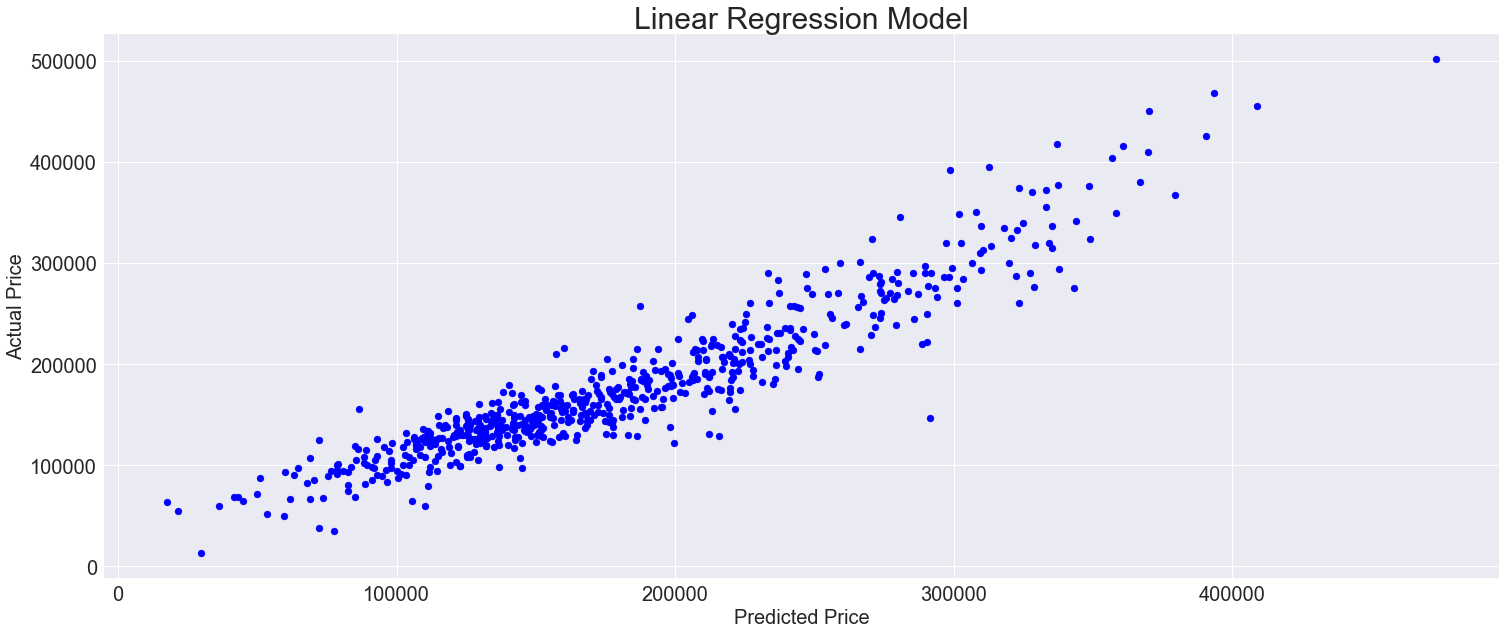

In [57]:
fig, ax = plt.subplots(figsize=(25, 10))
actual_values = y_test
plt.scatter(y_pred, actual_values,
            color='b')
plt.xlabel('Predicted Price', fontsize=20)
plt.ylabel('Actual Price', fontsize=20)
plt.title('Linear Regression Model', fontsize=30)
ax.tick_params(labelsize=20);

In [58]:
# Use gridsearchCV to get the best hyperparameter
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import ElasticNet, Lasso
# I will use ElasticNet to see both ridge and lasso.
en = ElasticNet()
params_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'alpha': np.linspace(0.0001, 100, 10),
    'l1_ratio': np.linspace(0.0001, 0.99, 10)
}
en_model = GridSearchCV(en, params_grid,cv=20, n_jobs=-1)
en_model.fit(Xs_train, y_train)
print(en_model.best_score_, en_model.best_params_)
best_estimator = en_model.best_estimator_


/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Obje

/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Obje

/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Obje

/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Obje

/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Obje

/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Obje

/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Obje

/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Obje

/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Obje

/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Obje

/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Obje

/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Obje

/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Obje

/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Obje

/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Obje

/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Obje

/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Obje

/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Obje

/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Obje

/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Obje

/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Obje

/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Obje

0.880109827986 {'alpha': 0.0001, 'fit_intercept': True, 'l1_ratio': 0.66003333333333325, 'normalize': True}


In [59]:
en_pred = []
for x in Xs_test:
    en_pred.append(final_prediction(x, en_model))

/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

In [60]:
print(en_model.score(Xs_test,y_test))
from sklearn.metrics import mean_squared_error
print ('RMSE for ElasticNEt is: \n', np.sqrt(mean_squared_error(y_test, en_pred)))

0.879499671391
RMSE for ElasticNEt is: 
 25167.419701


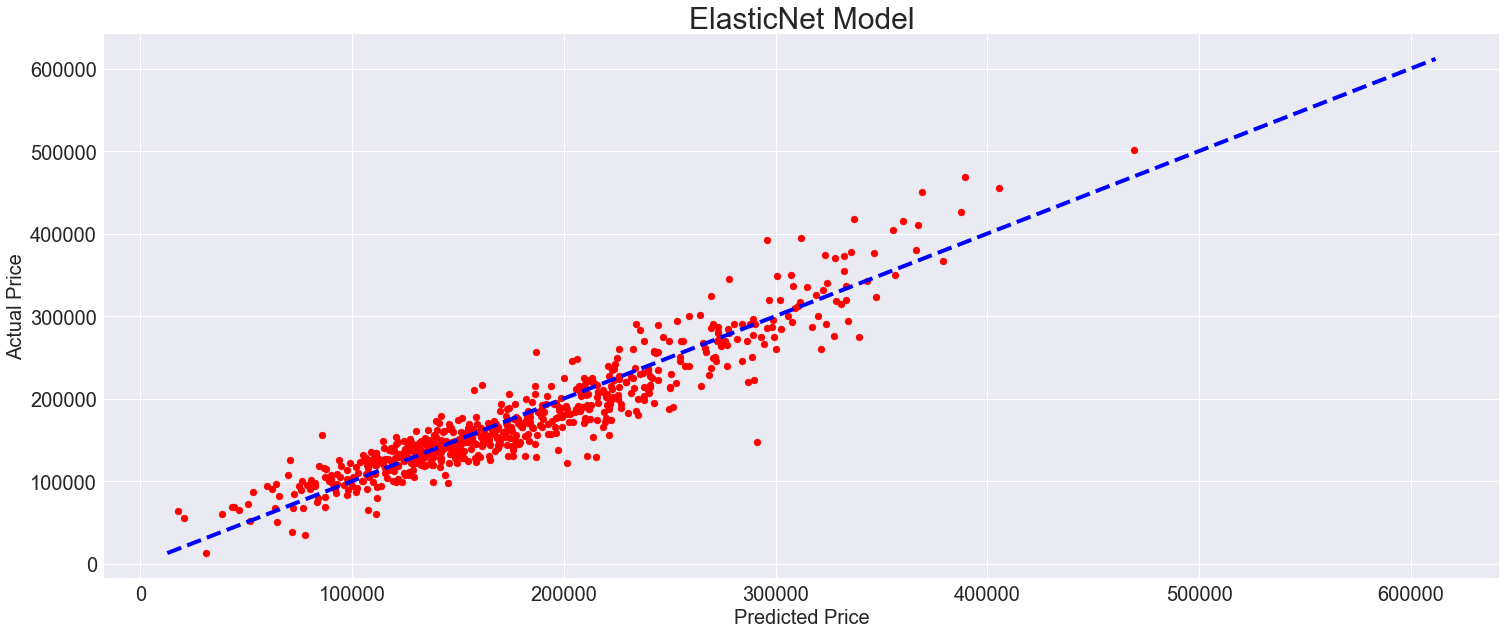

In [61]:
fig, ax = plt.subplots(figsize=(25, 10))
actual_values = y_test
plt.scatter(en_pred, actual_values, color='r')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4, color = 'blue')
plt.xlabel('Predicted Price', fontsize=20)
plt.ylabel('Actual Price', fontsize=20)
plt.title('ElasticNet Model', fontsize=30)
ax.tick_params(labelsize=20);

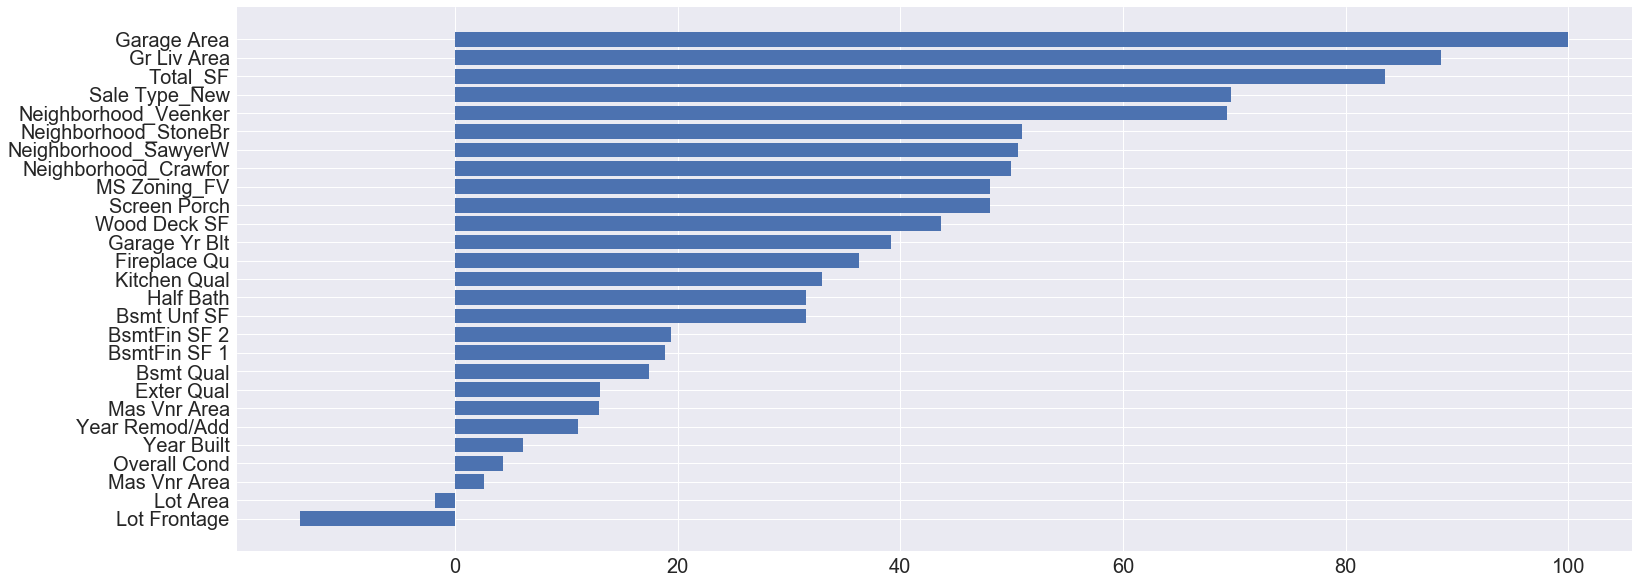

In [106]:
fig, ax = plt.subplots(figsize=(25, 10))
en.fit(Xs_train, y_train)
feature_importance = en.coef_
feature_importance = 100 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, sel_col)
ax.tick_params(labelsize=20);

In [62]:
# Lasso model
lasso = Lasso()
params_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'alpha': np.linspace(0.0001, 100, 10)
}

lasso_model = GridSearchCV(lasso, params_grid,cv=20, n_jobs=-1)
lasso_model.fit(Xs_train, y_train)
print(lasso_model.best_score_, lasso_model.best_params_)
best_estimator_lasso = lasso_model.best_estimator_


/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Obje

/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Obje

/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Obje

/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Obje

0.880237639481 {'alpha': 11.1112, 'fit_intercept': True, 'normalize': True}


In [63]:
lasso_pred = []
for x in Xs_test:
    lasso_pred.append(final_prediction(x, lasso_model))

/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

In [64]:
print(lasso_model.score(Xs_test,y_test))
print ('RMSE of lasso is: \n', np.sqrt(mean_squared_error(y_test, lasso_pred)))

0.878413218931
RMSE of lasso is: 
 25280.6220833


In [65]:
# GradientBoostingregressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr_params = {
    'n_estimators': range(50,200, 50),
    'max_depth': range(1,10),
    'max_features': ['auto', 'log2', None]
    
}
gbr_model = GridSearchCV(gbr, param_grid=gbr_params, cv=20)
gbr_model.fit(Xs_train, y_train)
print('best score', gbr_model.best_score_)

print('best param', gbr_model.best_params_)
gbr_model_be = gbr_model.best_estimator_


best score 0.917424153998
best param {'max_depth': 4, 'max_features': None, 'n_estimators': 100}


In [66]:
gbr_pred = []
for x in Xs_test:
    gbr_pred.append(final_prediction(x, gbr_model))

/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

In [67]:
print('Test set score is : ', gbr_model.score(Xs_test,y_test))
print ('RMSE for GBR is: \n', np.sqrt(mean_squared_error(y_test, gbr_pred)))

Test set score is :  0.901647160816
RMSE for GBR is: 
 22737.2546977


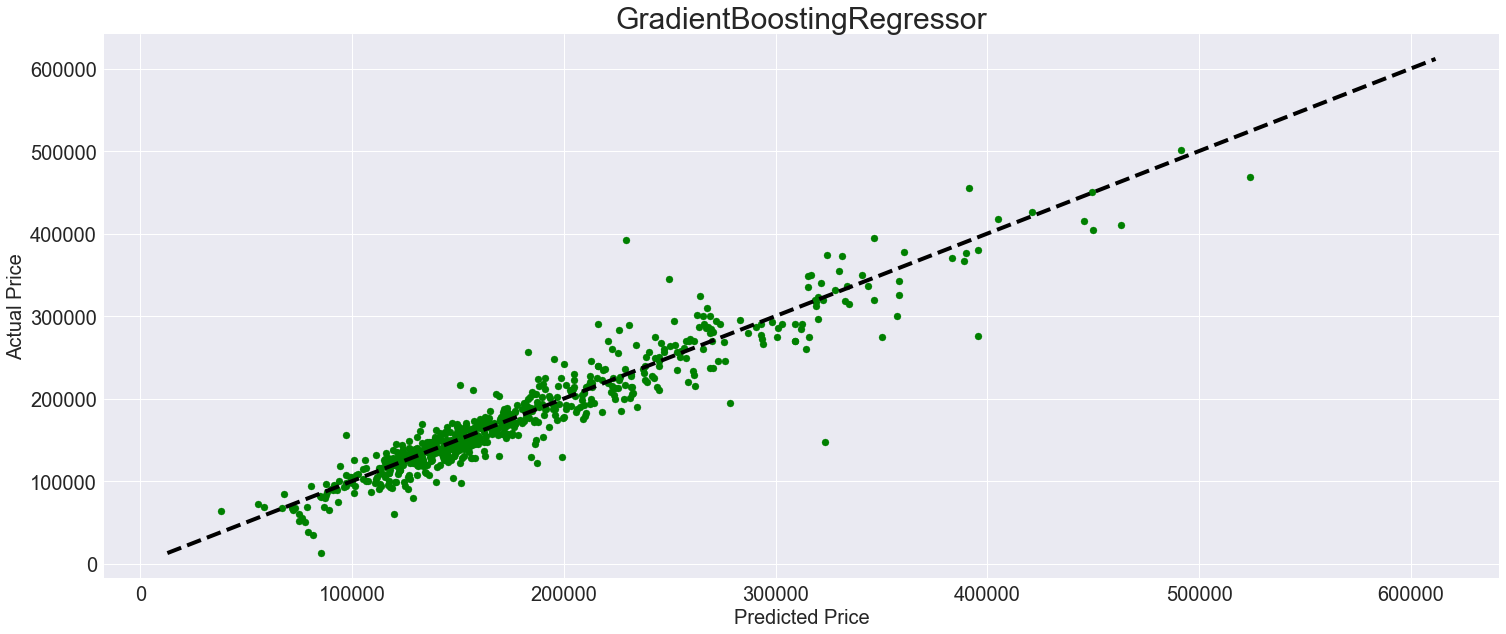

In [123]:
fig, ax = plt.subplots(figsize=(25, 10))
actual_values = y_test
plt.scatter(gbr_pred, actual_values, color='g') 
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4, color = 'black')
plt.xlabel('Predicted Price', fontsize=20)
plt.ylabel('Actual Price', fontsize=20)
plt.title('GradientBoostingRegressor', fontsize=30)
ax.tick_params(labelsize=20);

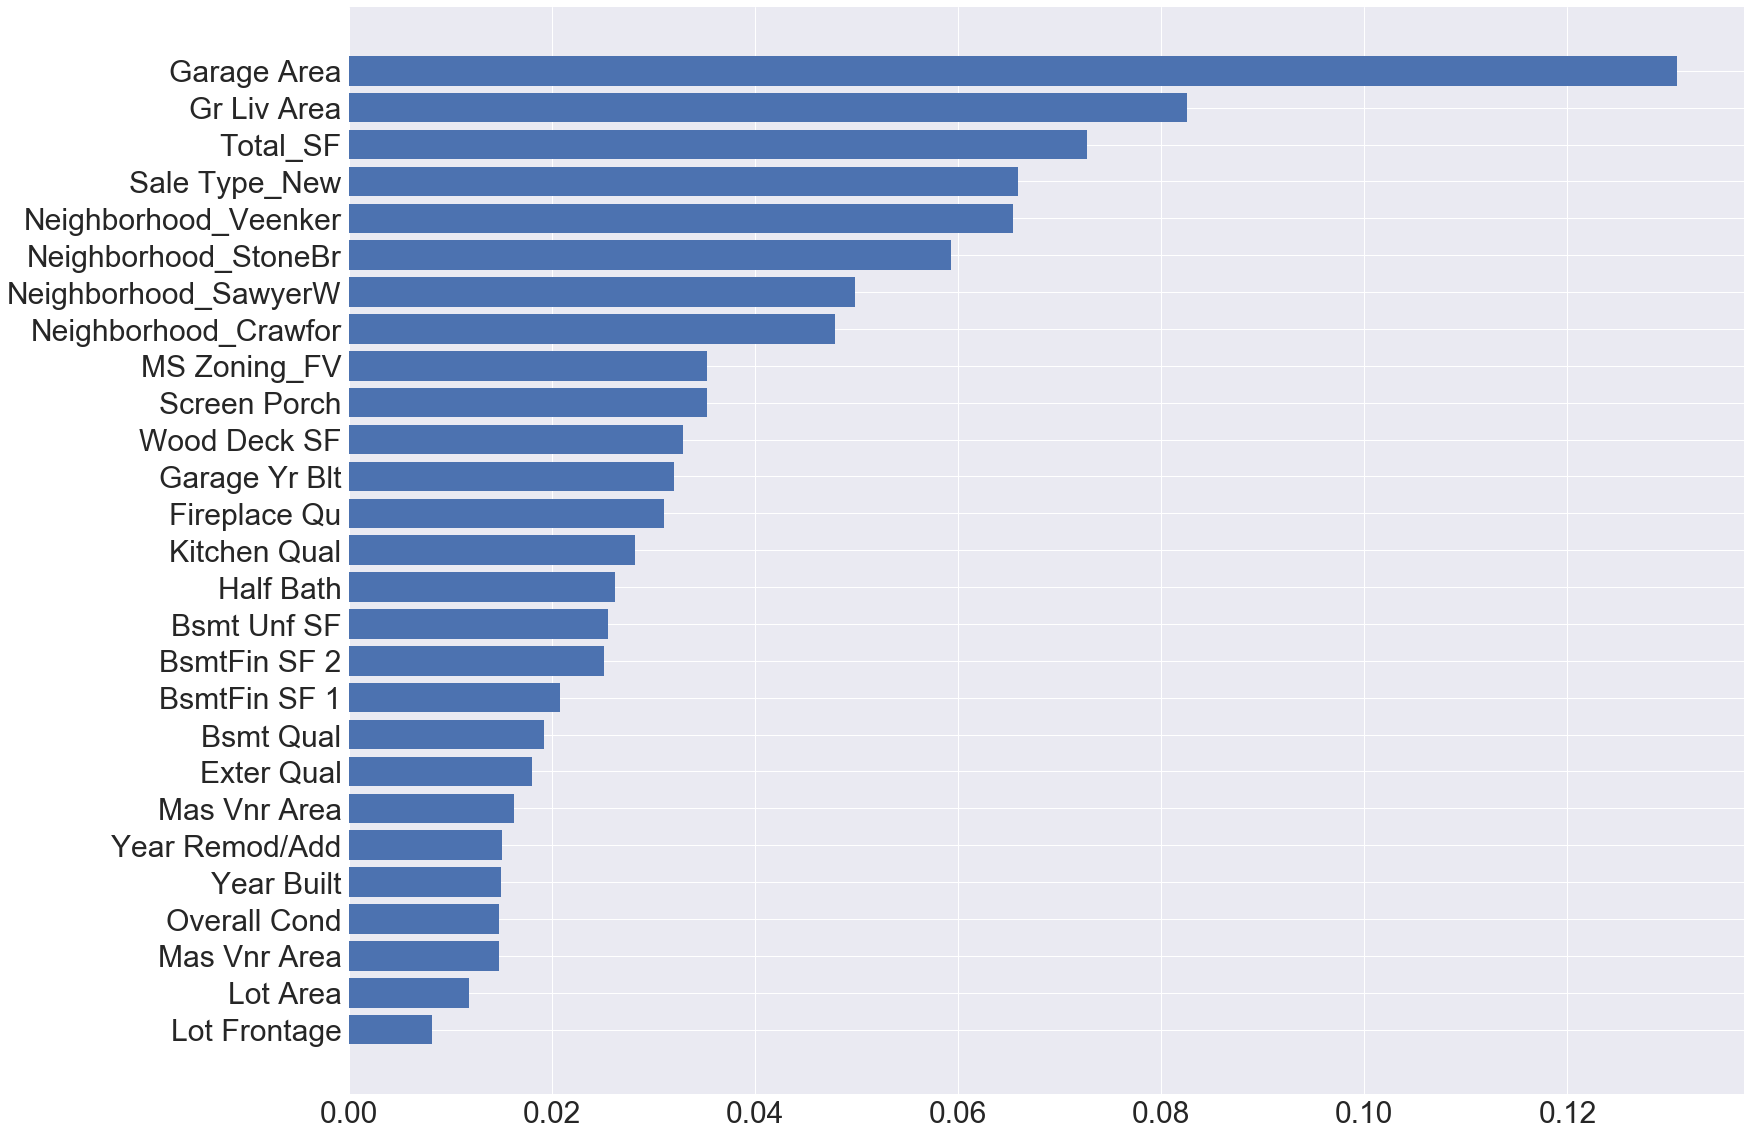

In [120]:
fig, ax = plt.subplots(figsize=(25,20))
gbr.fit(Xs_train, y_train)
feature_importance = gbr.feature_importances_
# feature_importance = 100 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, sel_col)
ax.tick_params(labelsize=30);


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr_params = {
    'n_estimators': range(10,200, 50),
    'max_features': ['auto', 'log2', None]
    
}
rfr_model = GridSearchCV(rfr, param_grid=gbr_params, cv=20)
rfr_model.fit(Xs_train, y_train)
print('best score', rfr_model.best_score_)
print('best param', rfr_model.best_params_)
rfr_model_be = rfr_model.best_estimator_


In [ ]:
rfr_pred = []
for x in Xs_test:
    rfr_pred.append(final_prediction(x, rfr_model))

In [ ]:
print('Test set score is : ', rfr_model.score(Xs_test,y_test))
print ('RMSE of Random forest regressor is: \n', np.sqrt(mean_squared_error(y_test, rfr_pred)))

# Final data

In [70]:
test = pd.read_csv('test.csv')
test.shape


(879, 80)

In [71]:
submission= pd.DataFrame()
submission['Id'] = test.Id

In [72]:
# Do samething to test set just like what I did on X_test.

In [73]:
test['MS SubClass'] = test['MS SubClass'].astype(str)
test['Yr Sold'] = test['Yr Sold'].astype(str)
test['Mo Sold'] = test['Mo Sold'].astype(str)
test['Overall Qual'] =test['Overall Qual'].astype(str)

In [74]:
def qual_cond_dict(x):
    if x =='Ex':
        return 5
    elif x == 'Gd':
        return 4
    elif x == 'TA':
        return 3
    elif x == 'Fa':
        return 2
    elif x == 'Po':
        return 1
    elif x == 'NA':
        return 0
    else :
        return x

In [75]:
test = test.applymap(qual_cond_dict)

In [76]:
for col in ['Alley', 'Fence', 'Misc Feature','Garage Type','Garage Finish',
            'Bsmt Exposure','BsmtFin Type 1', 'BsmtFin Type 2','Mas Vnr Type']:
    test[col] = test[col].fillna("None")
    

for col in ['Fireplace Qu','Pool QC','Garage Yr Blt',  'Garage Cars', 'Garage Area',
            'BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath',
            'Bsmt Half Bath','Mas Vnr Area','Bsmt Cond', 'Bsmt Qual',
            'Garage Qual', 'Garage Cond']:
    test[col] = test[col].fillna(0)

In [77]:
test['Lot Frontage'] = test.groupby('Neighborhood')['Lot Frontage'].transform(lambda x:x.fillna(x.median()))
test['Lot Frontage'].fillna(test['Lot Frontage'].median(), inplace=True)

In [78]:
test['Total_SF']= test['Total Bsmt SF']+test['1st Flr SF'] + test['2nd Flr SF']

In [79]:
test = pd.concat([test.drop(test[['MS Zoning','MS SubClass',
                                  'Bldg Type','House Style', 'Neighborhood', 'Sale Type']], axis=1),
                  pd.get_dummies(test[['MS Zoning','MS SubClass',
                                       'Bldg Type','House Style', 'Neighborhood', 'Sale Type']])], axis=1)

In [80]:
for col in ['Lot Shape','Land Contour', 'Overall Qual','Condition 1', 'Condition 2','Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type','BsmtFin Type 1',
       'BsmtFin Type 2', 'Heating', 'Central Air','Functional',
       'Garage Type', 'Garage Finish', 'Paved Drive', 'Fence', 'Misc Feature']:
    test[col] = le.fit_transform(test[col])


In [81]:
test = test[sel_col]

In [82]:
test.isnull().sum()[test.isnull().sum() > 0]

Series([], dtype: int64)

In [83]:
test.columns

Index(['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Exter Qual',
       'Bsmt Qual', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Half Bath',
       'Kitchen Qual', 'Fireplace Qu', 'Garage Yr Blt', 'Wood Deck SF',
       'Screen Porch', 'MS Zoning_FV', 'Neighborhood_Crawfor',
       'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'Sale Type_New', 'Total_SF', 'Gr Liv Area', 'Garage Area'],
      dtype='object')

In [84]:
test_ss = ss.transform(test)

In [85]:
def final_prediction(x, model):
    if x[0] > 150:
        return lf_outlier_price
    elif x[1]>30000:
        return lot_area_outlier_average
    elif x[2]> 800:
        return mva_outlier_price
    elif x[-1]>1200:
        return garage_area_outlier_average
    elif x[-2]>3000:
        return gla_outlier_price
    else :
        return model.predict(x)[0]

In [86]:
final_pred =[]
for x in test_ss:
    final_pred.append(final_prediction(x, gbr_model))

/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

In [87]:
submission['SalePrice'] = final_pred
submission.head()

,Id,SalePrice
0,2658,133703.071570
1,2718,154278.476060
2,2414,185074.107974
3,1989,117152.772557
4,625,160853.593482


In [88]:
submission.to_csv('submission_1108_1.csv', index=False)